In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<AxesSubplot: xlabel='GrLivArea'>

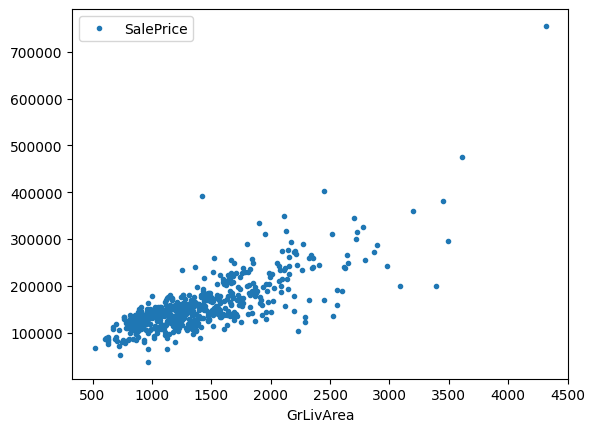

In [3]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [4]:
n = len(data)

In [5]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [6]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [7]:
denominator = n * sum_x2 - sum_x * sum_x

In [8]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [9]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

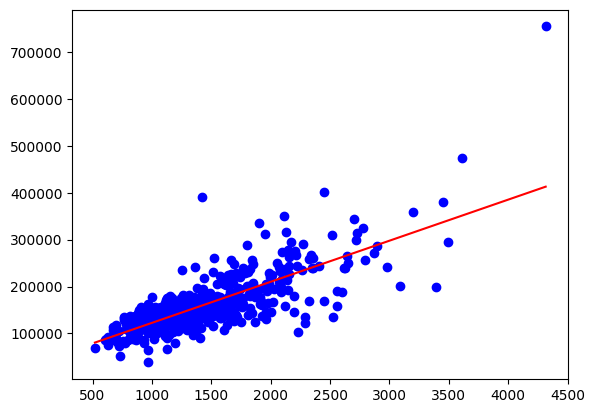

In [10]:
plot_data(x,y,m,b)

In [11]:
def model(x,m,b):
   return m * x + b

In [12]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [13]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [14]:
m = 5.
b = 1000.
print('y_i = %.2f * x + %.2f' % (m,b))

y_i = 5.00 * x + 1000.00


In [15]:
l = loss(x,y,m,b)
print('first 10 loss values: ',l[:10])

first 10 loss values:  [3.03421561e+10 3.55511025e+10 1.24579082e+10 1.91656336e+10
 1.60604929e+10 2.04432804e+10 1.72410030e+10 1.76517796e+10
 1.52769600e+10 2.18152900e+10]


y_i = 5.47 * x + 1000.00     previously calculated: y_i = 87.69 * x + 34754.08


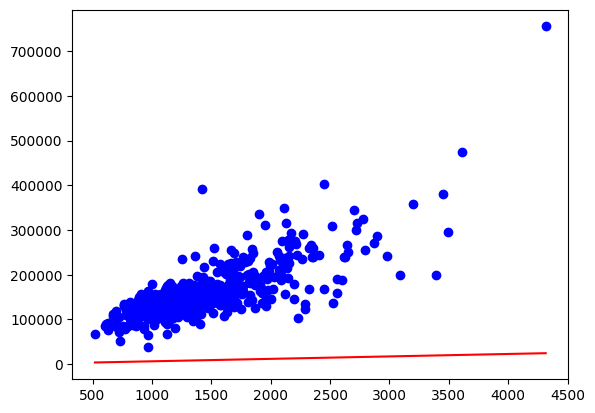

In [16]:
learning_rate = 1e-9
m = updated_m(x,y,m,b,learning_rate)
b = updated_b(x,y,m,b,learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(x,y,m,b)

<font size = "5">Batch size = 64, small learning rate, convergent <br>Batch sizes 32, 128, 256 and 512 were tried privately but not shown below.</font>

[029]  dy_i = 80.67 * x + 45009.22     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1880417551.858089


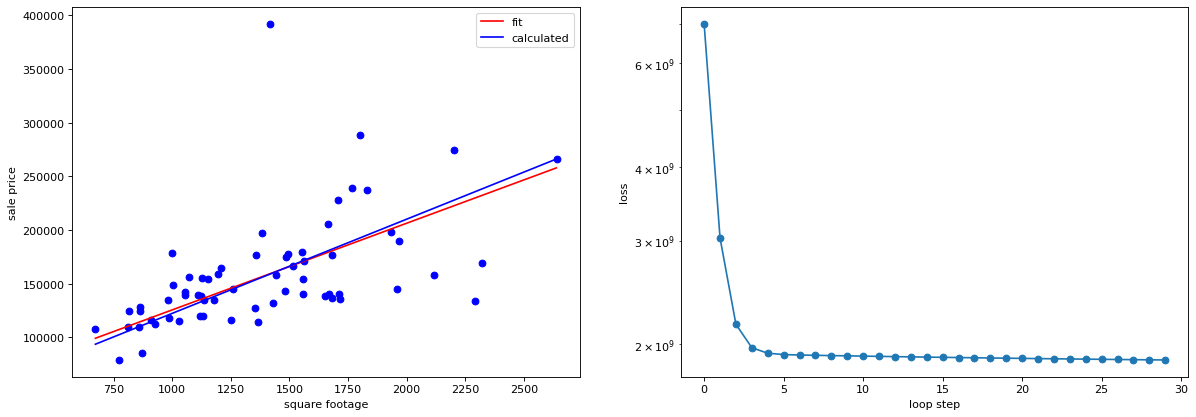

In [17]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
#data_x = data['GrLivArea'].to_numpy()
#data_y = data['SalePrice'].to_numpy()
#modification 1 with batch sampling:
batch_size = 64
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
#modification 2 with batch sampling (not needed):
#loop_N = 30*len(data)//batch_size
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)



<font size = "5">Batch size = 64, large learning rate, divergent <br>8 times of the small learning rate above</font>

[029]  dy_i = -536199.92 * x + 1053829264.36     previously calculated: y_i = 87.69 * x + 34754.08    loss: 173921421367565216.000000


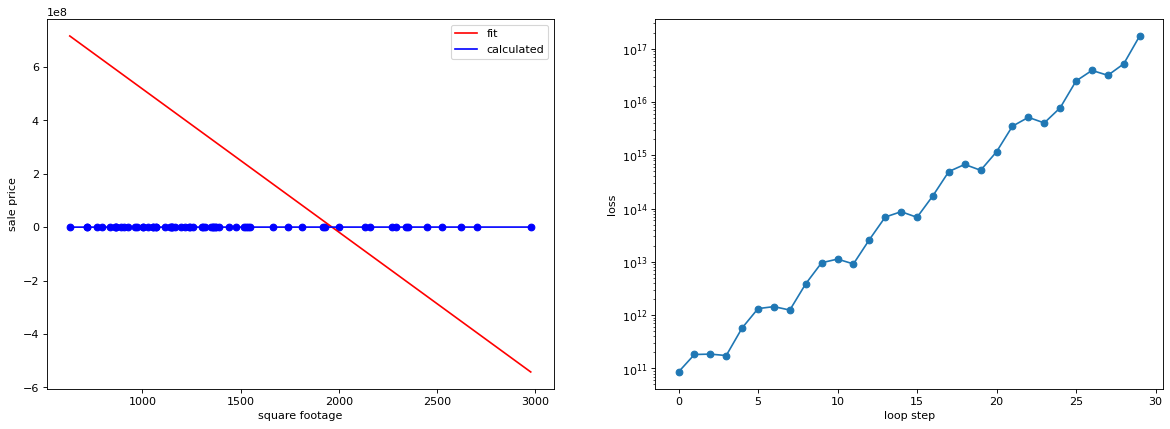

In [18]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 8e-7
learning_rate_b = 8e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
#data_x = data['GrLivArea'].to_numpy()
#data_y = data['SalePrice'].to_numpy()
#modification 1 with batch sampling:
batch_size = 64
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
#modification 2 with batch sampling:
#loop_N = 30*len(data)//batch_size
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

